In [1]:
!pip install fastai
!pip install fastbook
!pip install pathlib
!pip install fastai2

In [2]:
from fastai.vision.all import *
from fastai.data.all import *
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path
import os
import imageClassifierCleaner

ModuleNotFoundError: No module named 'imageClassifierCleaner'

In [ ]:
search_images_ddg

In [50]:
fruit_types = ['green apple','red apple','yellow apple', 'Orange', 'Lemon', 'dragon fruit']
path = Path('fruits')
if not path.exists():
    path.mkdir()
    for fruit in fruit_types:
        print(fruit)
        dest = (path/fruit)
        if not dest.exists():
            dest.mkdir()
        results = search_images_ddg(f'{fruit}')
        #print(results)
        download_images(dest, urls=results)

green apple
red apple
yellow apple
Orange
Lemon
dragon fruit


In [3]:
path = Path('fruits')

In [4]:
fns = get_image_files(path)
failed = verify_images(fns)
print(failed)
failed.map(Path.unlink);

[]


In [5]:
fruits = DataBlock(blocks = (ImageBlock,CategoryBlock),
                            get_items = get_image_files,
                            splitter = RandomSplitter(valid_pct=0.2, seed=42),
                            get_y=parent_label,
                            item_tfms=[Resize(256, method='squish')] 
                            )

In [6]:
CUDA_LAUNCH_BLOCKING  = 1
dls = fruits.dataloaders(path)

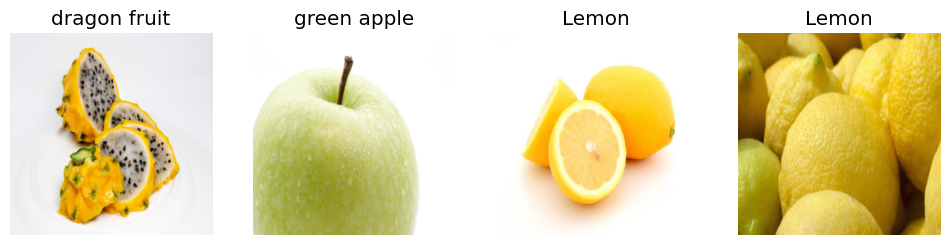

In [7]:
dls.valid.show_batch(max_n=4, nrows=1)

In [8]:
fruits = fruits.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = fruits.dataloaders(path)

In [29]:
!pip install GPUtil
!pip install numba

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 32.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 25.9 MB/s eta 0:00:0000:0100:01
Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% | 96% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  0% | 10% |


In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

learn.fine_tune(4)





/home/anish/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:

/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:

/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/anish/mambaforge/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


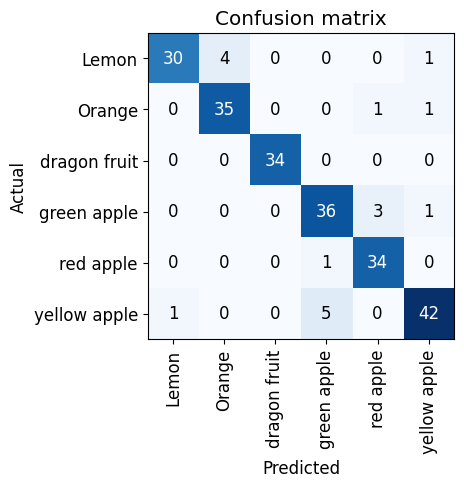

In [10]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
plt.style.use('dark_background')     

In [12]:
cleaner = imageClassifierCleaner(learn)
cleaner

NameError: name 'imageClassifierCleaner' is not defined

In [129]:
learn.export()